In [17]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import seaborn as sns
import matplotlib.pyplot as plt

#Задание 1 (на сопоставление)

Сопоставьте статистику и условия ее применения
Статистика Условие
1. z-тест
2. t-тест
3. F-тест
4. χ2-тест
5. ANOVA

A) анализ различий между многими выборками

B) проверка среднего выборки на конкретное значение при неизвестной дисперсии

C) соответствие структуры данных гипотетической модели

D) проверка дисперсии выборки на конкретное значение при известном среднем

E) проверка среднего выборки на конкретное значение при известной дисперсии

F) сравнение дисперсий двух выборок

G) наличие или отсутствие связи между параметрами

In [33]:
'1-E, 2-B, 3-F, 4-G, 5-A'

'1-E, 2-B, 3-F, 4-G, 5-A'

#Задание 2 (про порошок)

Порошок для посудомоечной машины насыпается в коробки, в которых он продается, с помощью
автоматического дозатора, который настроен на дозирование 3 кг порошка в каждую коробку. Чтобы
проверить, что дозатор работает в соответствии с приемлемым стандартом (т. е. не нуждается в настройке),
инженер-технолог берет случайные образцы из 50 коробок и взвешивает их. Установлено, что средний вес
образца составляет 3,005 кг. Известно, что дозатор работает с отклонением 0,015 кг и что производитель
порошка готов полагаться на 5% уровень значимости. Предоставляет ли образец инженеру достаточные
доказательства того, что истинное среднее значение не равно 3,00 кг, и поэтому машина требует
настройки?


In [3]:
# Данные
sample_mean = 3.005 # Средний вес образца в выборке 50 коробок
target_mean = 3.00  # Целевое (гипотетическое) среднее, настройка дозатора
std_dev     = 0.015 # Известное стандартное отклонение дозатора
n           = 50    # Размер выборки инженера-технолога
alpha       = 0.05  # Уровень значимости от производителя

# Расчеты
var = std_dev ** 2 # Расчет дисперсии
z_ras = (sample_mean - target_mean) / (std_dev / np.sqrt(n)) # z-тест
z_crit = stats.norm.ppf(1 - alpha / 2) # z критическое
p_value = 2 * (1 - stats.norm.cdf(abs(z_ras))) # p-value

# Выводы
print(f"Рассчитанное значение z_ras:      {z_ras:.4f}")
print(f"Критическое значение z_crit:    ± {z_crit:.4f}")
print(f"Дисперсия:                        {var:.6f}")
print(f"p-value:                          {p_value:.6f}")
if abs(z_ras) > z_crit:
    print("Отклонить нулевую гипотезу на основе критического значения z.")
else:
    print("Нельзя отклонить нулевую гипотезу на основе критического значения z.")
if p_value < alpha:
    print("Отклонить нулевую гипотезу на основе p-value.")
else:
    print("Нельзя отклонить на основе p-value.")

Рассчитанное значение z_ras:      2.3570
Критическое значение z_crit:    ± 1.9600
Дисперсия:                        0.000225
p-value:                          0.018422
Отклонить нулевую гипотезу на основе критического значения z.
Отклонить нулевую гипотезу на основе p-value.


#### ВЫВОДЫ
1. Проверяем среднеее выборки на конкретное значение (3,0 кг) при известной дисперсии (0.000225 - квадрат ст.отклонения), поэтому используем z - тест.
* (H0) Нулевая гипотеза - истинное среднее значение веса порошка в коробках равно 3.00 кг, дозатор не нуждается в настройке.
* (H1) Альтернативная гипотеза - истинное среднее значение веса порошка в коробках не равно 3.00 кг, дозатор требует настройки.

2. Расчетное значение статистики - z_ras = 2.3570

3. Критическое значение статистики для alpha/2 = 0.025: z_crit = 1.96 (взято из библиотеки scipy.stats). Обоснование выбора alpha/2: выбран двусторонний тест, т.к. в задании нет уточнения по направлению оценки (оценка превышения 3 кг или недобора 3 кг).

4. p-value: 0.018422
В расчете использована функция stats.norm.cdf (библиотека scipy.stats) - кумулятивная функция распределения стандартного нормального распределения. Взят двойной размер p-value т.к. тест дусторонний.

5. Расчетное z_ras (2.3570) больше критического z_crit (1.9600). Нулевая гипотеза отвергается.

6. p-value (0.018422) меньше alpha (0.05). Нулевая гипотеза отвергатеся.

7. По итогам сравнения расчетного значения z с критическим z, и сравениея p-value с alpha была отвергнута нулевая гипотеза о том что истинное среднее значение количества порошка в коробке не равно 3,00 кг. Образец представляет инженеру достаточные доказательства. Дозатор требует настройки.

#Задание 3 (про двигатели)

> Производитель двигателей хочет заменить стальные компоненты подвески алюминиевыми, чтобы снизить вес и тем самым улучшить производительность и расход топлива. Испытания на прочность проводятся на случайно выбранных образцах из двух возможных веществ, прежде чем будет сделан окончательный выбор. Результаты таковы:
---
```data = {
    '№ вещества': [1, 2],
    'Размер выборки': [15, 10],
    'Средняя прочность (кг*мм-2)': [90, 88],
    'Стандартное отклонение (кг*мм-2)': [2.3, 2.2]
}
```

---
> Есть ли разница между средними прочностными характеристиками веществ на уровне значимости 5%?


In [5]:
# Данные
data = {
    '№ вещества': [1, 2],
    'Размер выборки': [15, 10],
    'Средняя прочность (кг*мм-2)': [90, 88],
    'Стандартное отклонение (кг*мм-2)': [2.3, 2.2]
}
alpha = 0.05

# Извлечение данных
n1 = data['Размер выборки'][0]
n2 = data['Размер выборки'][1]
mean1 = data['Средняя прочность (кг*мм-2)'][0]
mean2 = data['Средняя прочность (кг*мм-2)'][1]
std1 = data['Стандартное отклонение (кг*мм-2)'][0]
std2 = data['Стандартное отклонение (кг*мм-2)'][1]

# Расчет
t_stat = (mean1 - mean2) / np.sqrt((std1**2 / n1) + (std2**2 / n2)) # Расчет t-статистики
df = n1 + n2 - 2                                                    # Степени свободы
t_crit = stats.t.ppf(1 - alpha/2, df)                               # Критическое t для двухстороннего теста
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df))                    # Расчет p-value

# Вывод
print(f"Расчетное значение t: {t_stat:.4f}")
print(f"Критическое значение t: ±{t_crit:.4f}")
print(f"p-value: {p_value:.4f}")
if abs(t_stat) > t_crit:
    print("Отклонить нулевую гипотезу: есть статистически значимые различия.")
else:
    print("Нельзя отклонить нулевую нулевую гипотезу: статистически значимых различий нет.")
if p_value < alpha:
    print("Отклонить нулевую гипотезу на основе p-value.")
else:
    print("Нельзя отклонить нулевую гипотезу на основе p-value.")


Расчетное значение t: 2.1865
Критическое значение t: ±2.0687
p-value: 0.0392
Отклонить нулевую гипотезу: есть статистически значимые различия.
Отклонить нулевую гипотезу на основе p-value.


#### ВЫВОДЫ
1. В задаче мы  проверяем средние выборки двух групп (прочность стальных и алюминиевых компонентов), истинное стандартное отклонение (и дисперсия) отсутвует, даны только стандартные отклонения для выборок поэтому выбираем t-тест.
* (H0) Нулевая гипотеза  - средняя прочность стальных компонентов равна средней прочности алюминиевых компонентов.
* (H1) Альтернативная гипотеза  - средняя прочность стальных компонентов не равна средней прочности алюминиевых компонентов.

2. Расчетное значение t:  2.1865

3. Критическое значение t:  ±2.0687

4. Значение p-value: 0.0392

5. Отвергаем нулевую гипотезу: существует статистически значимая разница между средними прочностными характеристиками. t_расч (2.1865) больше t_крит (2.0687)

6. Отвергаем нулевую гипотезу на основе p-value. p-value (0.0392) меньше alpha (0.05)

7. Cуществует статистически значимая разница между средними прочностными характеристиками стальных и алюминиевых копонентов на уровне значимости 5%. Замена стальных компонентов подвески на алюминиевые может повлиять на прочностные характеристики двигателя.

#Задание 4 (про токи)

Производитель электронного оборудования разработал схему для подачи тока на определенный компонент
экрана дисплея компьютера. Хотя новая конструкция дешевле в производстве, ее можно внедрить в
массовое производство только в том случае, если она пропускает к компоненту тот же средний ток. В ходе
испытаний с участием двух схем получены следующие результаты.
##### Номер	Старая конструкция (мА)	Новая конструкция (мА)
1. 80.1	80.7
2.	  82.3	81.3
3.	84.1	84.6
4.	82.6	81.7
5.	85.3	86.3
6.	81.3	84.3
7.	83.2	83.7
8.	81.7	84.7
9.	82.2	82.8
10.	81.4	84.4
11.	85.2
12.	84.9

Если предположить, что выборки, из которых взяты результаты, имеют равные дисперсии, следует ли
производителю заменить старую конструкцию схемы на новую? Используйте уровень значимости 5%

In [7]:
# Данные
old_constr = np.array([80.1, 82.3, 84.1, 82.6, 85.3, 81.3, 83.2, 81.7, 82.2, 81.4, 85.2, 84.9])
new_constr = np.array([80.7, 81.3, 84.6, 81.7, 86.3, 84.3, 83.7, 84.7, 82.8, 84.4])
alpha = 0.05

# Решение
mean_old = np.mean(old_constr)           # Средние значения выборки 1 (старая)
mean_new = np.mean(new_constr)           # Средние значения выборки 2 (новая)
std_old = np.std(old_constr, ddof=1)     # Стандартное отклонение выборки 1
std_new = np.std(new_constr, ddof=1)     # Стандартное отклонение выборки 2
n_old = len(old_constr)                  # Количество наблюдений выборки 1
n_new = len(new_constr)                  # Количество наблюдений выборки 2
sp = np.sqrt(((n_old - 1) * std_old**2
              + (n_new - 1) * std_new**2) / (n_old + n_new - 2))    # Общее ст. отклонение
t_stat = (mean_old - mean_new) / (sp * np.sqrt(1/n_old + 1/n_new))  # Расчет t-теста
df = n_old + n_new - 2                                              # Степени свободы
t_crit = stats.t.ppf(1 - alpha/2, df)                               # Критическое значение для двухстороннего теста
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df))                    # p-value

# Вывод
print(f"Расчетное значение t: {t_stat:.4f}")
print(f"Критическое значение t: ±{t_crit:.4f}")
print(f"p-value: {p_value:.4f}")
if abs(t_stat) > t_crit:
    print("Отклонить нулевую гипотезу: есть статистически значимые различия.")
else:
    print("Нельзя отклонить нулевую гипотезу: статистически значимых различий нет.")
if p_value < alpha:
    print("Отклонить нулевую гипотезу на основе p-value.")
else:
    print("Нельзя отклонить нулевую гипотезу на основе p-value.")

Расчетное значение t: -0.7981
Критическое значение t: ±2.0860
p-value: 0.4342
Нельзя отклонить нулевую гипотезу: статистически значимых различий нет.
Нельзя отклонить нулевую гипотезу на основе p-value.


#### ВЫВОДЫ
1. В задаче проверяем средние значения двух независимых выборок (токов старой и новой конструкции), истинное стандартное отклонение (и дисперсия) отсутвует, даны только стандартные отклонения для выборок поэтому выбираем t-тест.
* (H0) Нулевая гипотеза  - средний ток новой конструкции НЕ отличается от среднего тока старой конструкции.
* (H1) Альтернативная гипотеза  - средний ток новой конструкции не отличается от среднего тока старой конструкции.

2. Расчетное значение t:  -0.80

3. Критическое значение t:  ±2.09

4. Значение p-value: 0.43

5. Не отвергаем нулевую гипотезу: статистически значимых различий между токами нет. t_расч (0.80) меньше t_крит (2.09)

6. Не отвергаем нулевую гипотезу на основе p-value. p-value (0.43) больше alpha (0.05)

7. Нет достаточных оснований утверждать, что средний ток новой конструкции отличается от среднего тока старой конструкции. Производитель может заменить старую конструкцию схемы на новую, статистически значимых различий в токах нет.


#Задание 5 (про глюкозу)

Для оценки эффективности нового гипогликемического средства были проведены измерения уровня глюкозы в крови пациентов, страдающих сахарным диабетом, до и после приема препарата.
####В результате были получены следующие данные:
№ пациента Уровень глюкозы до препарата Уровень глюкозы после препарата
1. 9.6 7.7
2. 8.1 6.2
3. 8.8 7.4
4. 7.9 7.5
5. 9.2 8.3
6. 8.0 6.2
7. 8.4 8.1
8. 10.1 8.9
9. 7.8 7.4
10. 8.1 7.0

Определите, есть ли эффект от приема препарата на уровне доверия 0.95

In [9]:
# Данные
do = np.array([9.6, 8.1, 8.8, 7.9, 9.2, 8.0, 8.4, 10.1, 7.8, 8.1])      # Уровень глюкозы до препарата
posle = np.array([7.7, 6.2, 7.4, 7.5, 8.3, 6.2, 8.1, 8.9, 7.4, 7.0])    # Уровень глюкозы после приема препарата
D_int = 0.95 # Доверительный интервал

# Решение
t_stat, p_value = stats.ttest_rel(do, posle)                            # Выполнение парного t-теста
alpha = 1 - D_int                                                       # Уровень значимости для одностороннего теста
df = len(posle) - 1                                                     # Степени свободы
t_crit = stats.t.ppf(1 - alpha, df)                                     # критическое значения для одностороннего теста

# Вывод
print(f"Расчетное значение t: {t_stat:.4f}")
print(f"Критическое значение t: ±{t_crit:.4f}")
print(f"p-value: {p_value:.4f}")
if abs(t_stat) > t_crit:
    print("Отклонить нулевую гипотезу: есть статистически значимые различия.")
else:
    print("Нельзя отклонить нулевую гипотезу: статистически значимых различий нет.")
if p_value < alpha:
    print("Отклонить нулевую гипотезу на основе p-value.")
else:
    print("Нельзя отклонить нулевую гипотезу на основе p-value.")

Расчетное значение t: 5.7130
Критическое значение t: ±1.8331
p-value: 0.0003
Отклонить нулевую гипотезу: есть статистически значимые различия.
Отклонить нулевую гипотезу на основе p-value.


#### ВЫВОДЫ
1. В задаче проверяем средние значения двух выборок (уровень глюкозы до препарата и после применения новго препарата), выборки связанные (одни и те же пациенты) поэтому выбираем t-тест. Тест односторонний, т.к. предлагается оценить эффект (эффект препарата - снижение глюкозы).
* (H0) Нулевая гипотеза  - нет статистически значимого различия между средними значениями уровней глюкозы до и после применения препарата. То есть от препарата нет эффекта (снижение глюкозы).
* (H1) Альтернативная гипотеза  - есть статистически значимое различие между средними значениями уровней глюкозы до и после применения препарата. То есть от препарата есть эффект (снижение еглюкозы).

2. Расчетное значение t:  5.7130

3. Критическое значение t:  ±1.8331

4. Значение p-value: 0.0003

5. Не твергаем нулевую гипотезу: статистически значимых различий между токами нет. t_расч (5.7130) больше t_крит (1.8331)

6. Не твергаем нулевую гипотезу на основе p-value. p-value (0.0003) меньше alpha (0.05)

7. Cуществует статистически значимая разница между уровнем глюкозы до и после применения препарата на уровне доверия 95%.  Препарат имеет статистически значимый эффект на уровень глюкозы в крови, его применение может быть рекомендовано для снижения уровня глюкозы.

#Задание 6 (про тросы)

Производитель стальных тросов, используемых при строительстве подвесных мостов, экспериментировал
с новым типом стали, который, как он надеется, сделает производимые тросы более прочными в том
смысле, что они будут выдерживать большие нагрузки натяжения до разрушения. Для того чтобы
проверить производительность новых тросов по сравнению со старыми тросами, образцы испытываются
на разрушение при растяжении. Полученные результаты приведены ниже, где напряжения разрушения
указаны в кг×103
####№ теста Новый кабель Старый кабель
1. 92.7 90.1
2. 91.6 92.2
3. 94.7 94.3
4. 93.7 92.1
5. 96.5 93.4
6. 94.3 91.1
7. 93.7 93.2
8. 96.8 91.5
9. 98.9
10. 99.9

Изготовитель кабеля, изучив законодательство по охране труда и технике безопасности, решает, что в
любой статистической процедуре тестирования, принятой для различения кабелей, следует использовать
уровень значимости 1%. На основе полученных результатов и предполагая, что выборки, из которых взяты образцы, не имеют равных дисперсий, должен ли изготовитель заменить старый кабель новым?


In [11]:
# Данные
new_cab = np.array([92.7, 91.6, 94.7, 93.7, 96.5, 94.3, 93.7, 96.8, 98.9, 99.9])
old_cab = np.array([90.1, 92.2, 94.3, 92.1, 93.4, 91.1, 93.2, 91.5])
alpha = 0.01

# Расчет средних значений и стандартных отклонений
mean_new_cab = np.mean(new_cab)       # Среднее значение тестов нового кабеля
mean_old_cab = np.mean(old_cab)       # Среднее значение тестов старого кабеля
std_new = np.std(new_cab, ddof=1)     # Ст. отклонение выборки тестов нового кабеля
std_old = np.std(old_cab, ddof=1)     # Ст. отклонение выборки тестов старого кабеля
n_new = len(new_cab)                  # Размер выборки тестов нового кабеля
n_old = len(old_cab)                  # Размер выборки тестов старого кабеля
t_stat = (mean_new_cab - mean_old_cab) / np.sqrt((std_new**2 / (n_new-1)) # Расчет t-стат
                                            + (std_old**2 / (n_old-1)))
df = (
    ((std_new**2 / n_new) + (std_old**2 / n_old))**2 /
    (((std_new**2 / n_new)**2 / (n_new - 1))
    + ((std_old**2 / n_old)**2 / (n_old - 1))))  # Степени свободы для неравных дисперсий
t_crit = stats.t.ppf(1 - alpha, round(df)) # Находим t крит
p_value = 1 - stats.t.cdf(t_stat, round(df)) # p-value

# Вывод
print(f"Степеней свободы:         {round(df)}")
print(f"Среднее нового кабеля:    {mean_new_cab:.2f}")
print(f"Среднее старого кабеля:   {mean_old_cab:.2f}")
print(f"t_stat:                   {t_stat:.2f}")
print(f"t_crit:                   {t_crit:.2f}")
print(f"p-value:                  {p_value:.4f}")
if abs(t_stat) > t_crit:
    print("Отклонить нулевую гипотезу: есть статистически значимые различия.")
else:
    print("Нельзя отклонить нулевую гипотезу: статистически значимых различий нет.")
if p_value < alpha:
    print("Отклонить нулевую гипотезу на основе p-value.")
else:
    print("Нельзя отклонить нулевую гипотезу на основе p-value.")

Степеней свободы:         14
Среднее нового кабеля:    95.28
Среднее старого кабеля:   92.24
t_stat:                   2.95
t_crit:                   2.62
p-value:                  0.0053
Отклонить нулевую гипотезу: есть статистически значимые различия.
Отклонить нулевую гипотезу на основе p-value.


#### ВЫВОДЫ
1. В задаче проверяем средние значения двух выборок (результаты испытания нового и старого кабелей), выборки имеют неравные дисперсии поэтому выбираем t-тест. Тест односторонний, т.к. предлагается оценить прочнее ли новые тросы по отношению к старым.
* (H0) Нулевая гипотеза  - cредняя прочность нового кабеля НЕ больше, чем у старого.
* (H1) Альтернативная гипотеза  - cредняя прочность нового кабеля больше, чем у старого.

2. Расчетное значение t:  2.92

3. Критическое значение t:  2.62

4. Значение p-value: 0.0053

5. Отвергаем нулевую гипотезу: t_расч (2.92) больше t_крит (2.62)

6. Отвергаем нулевую гипотезу на основе p-value: p-value (0.0053) меньше alpha (0.01)

7. Cуществует статистически значимая разница между между новым и старым кабелем с уровнем значимости 1%.  Новые тросы прочнее старых.Производитель может заменить старый кабель новым.

#Задание 7 (про абитуриентов)

10 абитуриентов пришли на подготовительные курсы по ЕГЭ и написали тестирование в начале обучения
и после.
####Результаты теста приведены в таблице.
* № 1 2 3 4 5 6 7 8 9 10
* До 7 6 5 4 6 2 10 3 8 5
* После 9 6 4 5 7 4 10 6 9 6

Влияют ли подготовительные курсы на подготовку абитуриентов на уровне значимости 0.01?

In [12]:
# Данные
before_courses = np.array([7, 6, 5, 4, 6, 2, 10, 3, 8, 5]) # результаты тестирования до курсов
after_courses = np.array([9, 6, 4, 5, 7, 4, 10, 6, 9, 6]) # результаты тестирования после курсов
alpha = 0.01 # уровень значимости

# Решение
t_stat, p_value = stats.ttest_rel(before_courses, after_courses) # Выполнение парного t-теста
df = len(after_courses) - 1  # Степени свободы
t_crit = stats.t.ppf(1 - alpha, df) # критическое значения для одностороннего теста

# Вывод
print(f"Расчетное значение t: {t_stat:.4f}")
print(f"Критическое значение t: ±{t_crit:.4f}")
print(f"p-value: {p_value:.4f}")
if abs(t_stat) > t_crit:
    print("Отклонить нулевую гипотезу: есть статистически значимые различия.")
else:
    print("Нельзя отклонить нулевую гипотезу: статистически значимых различий нет.")
if p_value < alpha:
    print("Отклонить нулевую гипотезу на основе p-value.")
else:
    print("Нельзя отклонить нулевую гипотезу на основе p-value.")

Расчетное значение t: -2.7386
Критическое значение t: ±2.8214
p-value: 0.0229
Нельзя отклонить нулевую гипотезу: статистически значимых различий нет.
Нельзя отклонить нулевую гипотезу на основе p-value.


#### ВЫВОДЫ
1. В задаче проверяем средние значения двух выборок (результаты тестирования до и после подготовки), выборки связаны поэтому выбираем t-тест. Тест односторонний, т.к. предлагается оценить влияние курсов (т.е. возможное улучшение результатов).
* (H0) Нулевая гипотеза  - подготовительные курсы НЕ оказывают значительного влияния на результаты тестирования абитуриентов.
* (H1) Альтернативная гипотеза  - подготовительные курсы оказывают значительне влияния на результаты тестирования абитуриентов.

2. Расчетное значение t:  2.74

3. Критическое значение t:  2.82

4. Значение p-value: 0.0229

5. Не отвергаем нулевую гипотезу: t_расч (2.74) меньше t_крит (2.82)

6. Не отвергаем нулевую гипотезу на основе p-value: p-value (0.0229) больше alpha (0.01)

7. Нет статистически значимой разницы между средними значениями тестирования абитурьенто до и после курсов с уровнем значимости 1%.  На уровне значимости 1% подготовительные курсы не влияют на подготовку абитурьентов.

#Задание 8 (про фрукты и IQ)

Были проведены исследования влияния фруктов на IQ людей. Первая группа среди всех фруктов питалась
исключительно апельсинами, вторая – только грушами.
* № 1 2 3 4 5 6 7 8 9 10
* Апельсины 125 138 112 130 124 125 110 112 117 126
* Груши 124 102 142 130 131 124 127 115 108 109


Проверьте гипотезу, что дисперсии обеих групп одинаковые на уровне значимости 0.05.

In [14]:
# Данные
oranges = np.array([125, 138, 112, 130, 124, 125, 110, 112, 117, 126])
pears = np.array([124, 102, 142, 130, 131, 124, 127, 115, 108, 109])
alpha = 0.05

# Расчет
s_sq_1 = np.var(oranges, ddof=1)  # Дисперсия для апельсинов
s_sq_2 = np.var(pears, ddof=1)    # Дисперсия для груш
F_stat = s_sq_1 / s_sq_2               # Расчет статистики F
df1 = len(oranges) - 1            # Степени свободы для первой группы
df2 = len(pears) - 1              # Степени свободы для второй группы
F_crit_upper = stats.f.ppf(1 - alpha / 2, df1, df2)  # Верхний критический
F_crit_lower = stats.f.ppf(alpha / 2, df1, df2)      # Нижний критический
p_value = 1 - stats.f.cdf(F_stat, df1, df2)    # p-value

# Выводы
print(f"Выборочная дисперсия апельсинов:  {s_sq_1:.4f}")
print(f"Выборочная дисперсия груш:        {s_sq_2:.4f}")
print(f"F расчетное:                      {F_stat:.4f}")
print(f"F критическое:                   [{F_crit_lower:.4f}, {F_crit_upper:.4f}]")
print(f"p-value:                          {p_value:.4f}")
if F_stat < F_crit_lower or F_stat > F_crit_upper:
    print("Отклонить нулевую гипотезу: дисперсии групп различаются.")
else:
    print("Нельзя отклонить нулевую гипотезу: дисперсии групп одинаковы.")
if p_value < alpha:
    print("Отклонить нулевую гипотезу на основе p-value: дисперсии групп различаются.")
else:
    print("Нельзя отклонить нулевую гипотезу на основе p-value: дисперсии групп равны.")

Выборочная дисперсия апельсинов:  80.7667
Выборочная дисперсия груш:        153.9556
F расчетное:                      0.5246
F критическое:                   [0.2484, 4.0260]
p-value:                          0.8247
Нельзя отклонить нулевую гипотезу: дисперсии групп одинаковы.
Нельзя отклонить нулевую гипотезу на основе p-value: дисперсии групп равны.


1. Т.к. сравнивается дисперсия двух выборок, предлагаю использовать F - тест.
* (H0) Нулевая гипотеза  - дисперсии равны.
* (H1) Альтернативная гипотеза  - дисперсии различаются.

2. Расчетное значение F:  7.78

3. Критическое значение F:  [0.2484, 4.0260]

4. Значение p-value: 0.8247

5. Не отвергаем нулевую гипотезу: F_расч (7.78) находится в границах F_крит [0.2484, 4.0260].

6. Не отвергаем нулевую гипотезу на основе p-value: p-value (0.825) больше alpha (0.05)

7. Дисперсии групп, которые питались только апельсинами и только грушами одинаковы с уровнем значимости 5%.

#Задание 9 (про самолеты)

Для 100 самолетов была составлена таблица, показывающая, сколько потребовалось вылетов каждому самолету, чтобы найти потерявшийся в море корабль.
* Вылет 1 2 3 4 5 6 7 8 9
* Кол-во 36 23 11 13 8 3 2 1 3

Предложите распределение, которое могло бы соответствовать этим данным на уровне доверия 0.95.


In [15]:
# Данные
planes = np.array([36, 23, 11, 13, 8, 3, 2, 1, 3])
alpha = 0.05
N = 100

# Расчет
mean_flights = np.sum(planes * np.arange(1, len(planes) + 1)) / N  # Среднеее количество вылетов
p = 1 / mean_flights                                               # Вероятность успеха
exp = N * (p * (1 - p) ** np.arange(len(planes)))                  # Ожидаемые значения
chi_2_stat = np.sum((planes - exp) ** 2 / exp)                     # Подсчет хи-квадрат
df = len(planes) - 1                                               # Степени свободы
chi_2_crit = stats.chi2.ppf(1 - alpha, df)                         # критический хи2
p_value = 1 - stats.chi2.cdf(chi_2_stat, df)                       # p-value

# Выводы
print(f"Наблюдаемое хи2: {chi_2_stat:.4f}")
print(f"Критическое хи2: {chi_2_crit:.4f}")
print(f"p-value: {p_value:.4f}")
if chi_2_stat > chi_2_crit:
    print("Отклонить нулевую гипотезу по критическому значению.")
else:
    print("Нельзя отклонить нулевую гипотезу по критическому значению.")
if p_value < alpha:
    print("Отклонить нулевую гипотезу на основе p-value.")
else:
    print("Нельзя отклонить нулевую гипотезу на основе p-value.")

Наблюдаемое хи2: 7.7825
Критическое хи2: 15.5073
p-value: 0.4550
Нельзя отклонить нулевую гипотезу по критическому значению.
Нельзя отклонить нулевую гипотезу на основе p-value: дисперсии групп равны.


#### ВЫВОДЫ
1. Т.к. проверяется наличие связи между данными и предложенным распредением - будем использовать критерий хи2. Вероятность нахождения корабля постоянна и независима для каждого вылета, поэтому количество вылетов, необходимых для нахождения корабля, может следовать геометрическому распределению.
* (H0) Нулевая гипотеза  - данные о количестве вылетов соответствуют геометрическому распределению.
* (H1) Альтернативная гипотеза  - данные о количестве вылетов НЕ соответствуют геометрическому распределению.

2. Расчетное значение Chi2:  7.78

3. Критическое значение Chi2:  15.51

4. Значение p-value: 0.445

5. Не отвергаем нулевую гипотезу: Chi2_расч (7.78) меньше Chi2_крит (15.51)

6. Не отвергаем нулевую гипотезу на основе p-value: p-value (0.445) больше alpha (0.05)

7. Данные о количестве вылетов соответствуют геометрическому распределению с уровнем значимости 5%.

#Задание 10 (про цвет глаз и волос)

В ходе исследования изучается взаимосвязь между цветом глаз (голубые, карие, зелёные) и цветом волос
(светлые, тёмные, рыжие).
####Собираются следующие данные:
* Светлые Темные Рыжие Всего
* Голубые 35 52 13 100
* Карие 28 42 10 80
* Зеленые 7 10 3 20
* Всего 70 104 26 200

Существует ли связь между цветом волос и цветом глаз? Определите на уровне доверия 0.95


In [16]:
# Данные
data = np.array([[35, 52, 13],
                 [28, 42, 10],
                 [7, 10, 3]])
Dov = 0.95

# Расчет
exp = np.outer(data.sum(axis=1), data.sum(axis=0)) / data.sum()         # Ожидаемые частоты
chi2_stat = ((data - exp) ** 2 / exp).sum()                             # Подсчет хи2
df = (data.shape[0] - 1) * (data.shape[1] - 1)                          # Степени свободы
alpha = 1 - Dov
chi2_crit = stats.chi2.ppf(1 - alpha, df)                               # хи2 критическое
p_value = 1 - stats.chi2.cdf(chi2_stat, df)                             # p-value

# Вывод результатов
print(f"Степени свободы:  {df}")
print(f"Наблюдаемое хи2:  {chi2_stat:.2f}")
print(f"Критическое хи2:  {chi2_crit:.2f}")
print(f"p-value:          {p_value:.4f}")
if chi2_stat > chi2_crit:
    print("Отклонить нулевую гипотезу на основе критического знаения.")
else:
    print("Нельзя отклонить нулевую гипотезу на основе критического знаения.")

if p_value < alpha:
    print("Отклонить нулевую гипотезу на основе p-value.")
else:
    print("Нельзя отклонить нулевую гипотезу на основе p-value.")

Степени свободы:  4
Наблюдаемое хи2:  0.10
Критическое хи2:  9.49
p-value:          0.9989
Нельзя отклонить нулевую гипотезу на основе критического знаения.
Нельзя отклонить нулевую гипотезу на основе p-value.


#### ВЫВОДЫ
1. Т.к. проверяется наличие связи между данными - будем использовать критерий хи2.
* (H0) Нулевая гипотеза  - нет статистически значимой связи между цветом глаз и цветом волос.
* (H1) Альтернативная гипотеза  - существует статистически значимая связь между цветом глаз и цветом волос.

2. Расчетное значение Chi2:  0.10

3. Критическое значение Chi2:  9.49

4. Значение p-value: 0.999

5. Не отвергаем нулевую гипотезу: Chi2_расч (0.10) меньше Chi2_крит (9.49)

6. Не отвергаем нулевую гипотезу на основе p-value: p-value (0.999) больше alpha (0.05)

7. Нет статистически значимой связи между цветом глаз и цветом волос на уровне довкрия 95%.

#Задание 11 (про тигров)

Международная ассоциация защиты животных собрала данные с разных зоопарков о типах корма тигров и их массе:
* №1 151 135 137 118 132 135 131 121 137 140 152 133 151 132
* №2 108 123 145 103 110 124 116 108 104 130 106 105 114 108
* №3 140 152 149 132 124 146 156 137 124 145 147 139 157 139
* №4 127 135 110 116 119 123 102 121 118 120 114 134 121 109

Оцените влияние типа корма на среднюю массу тигров с уровнем значимости 0.05. В случае, если есть основания отвергнуть нулевую гипотезу о равенстве средних по выборкам, примените тест Тьюки для подробного определения того, в каких парах групп наблюдается существенное отличие в средних.


In [32]:
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Данные
data = {
    'Корм 1': [151, 135, 137, 118, 132, 135, 131, 121, 137, 140, 152, 133, 151, 132],
    'Корм 2': [108, 123, 145, 103, 110, 124, 116, 108, 104, 130, 106, 105, 114, 108],
    'Корм 3': [140, 152, 149, 132, 124, 146, 156, 137, 124, 145, 147, 139, 157, 139],
    'Корм 4': [127, 135, 110, 116, 119, 123, 102, 121, 118, 120, 114, 134, 121, 109]
}
alpha = 0.05  # Уровень значимости

# Расчет
df = pd.DataFrame(data)
total_mean = df.values.flatten().mean()                   # Общая средняя масса
n = df.count().sum()                                      # Общее количество наблюдений
group_means = df.mean()                                   # Средние массы для каждой группы
k = len(df.columns)                                       # Количество групп
SSB = sum(df.count().iloc[i] * (group_means.iloc[i] - total_mean)**2 for i in range(k)) # Сумма квадратов между группами (SSB)
SSW = sum(((df.iloc[:, i] - group_means.iloc[i])**2).sum() for i in range(k))           # Сумма квадратов внутри групп (SSW)
df_between = k - 1                                        # Степени свободы между группами
df_within = n - k                                         # Степени свободы внутри групп
MSB = SSB / df_between                                    # Средние квадраты между группами
MSW = SSW / df_within                                     # Средние квадраты внутри групп

F_stat = MSB / MSW                                                                      # F-статистика
F_crit = stats.f.ppf(1 - alpha, dfn = df_between, dfd = df_within)                      # F критичное
p_value = 1 - stats.f.cdf(np.abs(F_stat), dfn = df_between, dfd = df_within)            # p-value

# Проведение теста Тьюки
melted_df = df.melt(var_name='Корм', value_name='Масса')
tukey = pairwise_tukeyhsd(melted_df['Масса'], melted_df['Корм'])

# Вывод
print(f"F-статистика: {F_stat:.2f}")
print(f"F-критичное: {F_crit:.2f}")
print(f"p-value: {p_value:.4f}")
if F_stat > F_crit:
    print("Отклонить нулевую гипотезу на основе критического знаения.")
else:
    print("Нельзя отклонить нулевую гипотезу на основе критического знаения.")

if p_value < alpha:
    print("Отклонить нулевую гипотезу на основе p-value.")
else:
    print("Нельзя отклонить нулевую гипотезу на основе p-value.")

print("\nРезультаты теста Тьюки:")
print(tukey)



F-статистика: 21.93
F-критичное: 2.78
p-value: 0.0000
Отклонить нулевую гипотезу на основе критического знаения.
Отклонить нулевую гипотезу на основе p-value.

Результаты теста Тьюки:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
Корм 1 Корм 2    -21.5    0.0  -32.019  -10.981   True
Корм 1 Корм 3   5.8571  0.458  -4.6619  16.3762  False
Корм 1 Корм 4 -16.8571 0.0005 -27.3762  -6.3381   True
Корм 2 Корм 3  27.3571    0.0  16.8381  37.8762   True
Корм 2 Корм 4   4.6429 0.6473  -5.8762  15.1619  False
Корм 3 Корм 4 -22.7143    0.0 -33.2333 -12.1953   True
------------------------------------------------------


#### ВЫВОДЫ
1. Нужно сравнить различия между многими выборками, поэтому будем использовать однофакторный ANOVA.
* (H0) Нулевая гипотеза  - средние массы тигров для всех типов корма равны.
* (H1) Альтернативная гипотеза  - есть как минимум 2 типа корма, для которых средние массы тигров различаются.

2. Расчетное значение F:  21.93

3. Значение p-value: 0.000

4. Отвергаем нулевую гипотезу на основе p-value: p-value (0.000) меньше alpha (0.05)

5. Результаты теста Тьюки представлены выше в таблице.

6. Масса тигров, которых кормили парами кормов (1, 2), (1, 4), (2, 3), (3, 4) различаются статистически значимо (p < 0.05), между массами тигров которых кормили парами кормов (1, 3), (2, 4) статистически нет разницы (p > 0.05).

7. Тип корма оказывает влияние на среднюю массу тигров. Различия в массе тигров, которых кормили разными типами корма, являются статистически значимыми.
Результаты теста Тьюки показали что в среднем масса тигров, которые ели корма №2 и №4 больше чем у тигров, которые ели корма №1 и №3.

#Задание 12 (про белок)

Изучается влияние размножения на массу тела у самок африканских земляных белок разного возраста.
РРезультаты занесены в таблицу:
* Возраст: 1 год
Без выводка: [440, 438, 429, 502, 602],
С выводком: [308, 328, 326, 326, 325]
* Возраст: 2 года
Без выводка: [892, 868, 855, 866, 932],
С выводком: [737, 798, 876, 810, 861]
* Возраст: 3 и более лет
Без выводка: [1575, 849, 759, 1602, 1327],
С выводком': [1001, 901, 958, 1032, 883]

Определите наличие влияния факторов на целевое значение на уровне доверия 0,95, используя последовательные суммы квадратов.

                       df     sum_sq       mean_sq          F        PR(>F)
Возраст               2.0  2427075.8  1.213538e+06  42.377707  1.333903e-08
Размножение           1.0   202705.2  2.027052e+05   7.078626  1.368668e-02
Размножение:Возраст   2.0    50688.2  2.534410e+04   0.885036  4.257428e-01
Residual             24.0   687269.6  2.863623e+04        NaN           NaN

Фактор 'Возраст' статистически значим (p-value = 0.0000).
Фактор 'Размножение' статистически значим (p-value = 0.0137).
Фактор 'Размножение:Возраст' не статистически значим (p-value = 0.4257).
Фактор 'Residual' не статистически значим (p-value = nan).

                      Multiple Comparison of Means - Tukey HSD, FWER=0.05                       
           group1                      group2           meandiff p-adj   lower    upper   reject
------------------------------------------------------------------------------------------------
        1 год - Без выводка          1 год - С выводком   -159.6 0.6728 -49

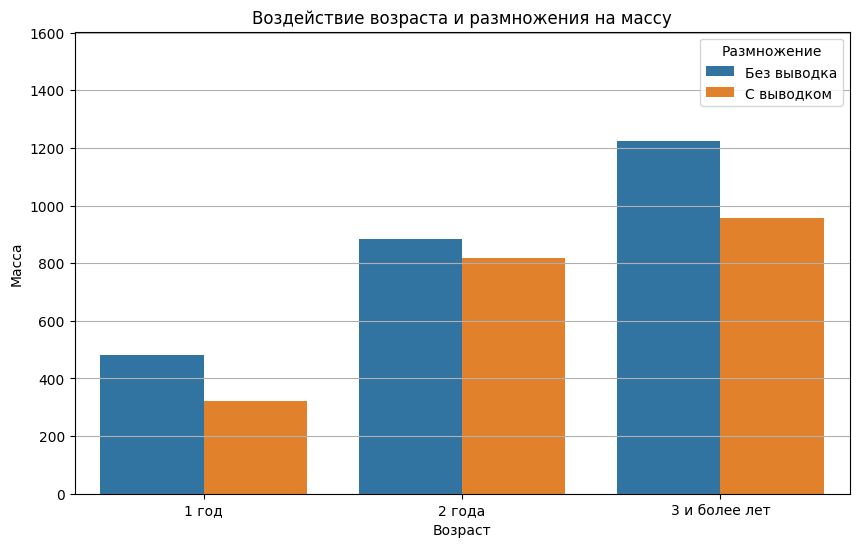

In [38]:
# Данные
data = {
    'Возраст': ['1 год'] * 10 + ['2 года'] * 10 + ['3 и более лет'] * 10,
    'Размножение': ['Без выводка'] * 5 + ['С выводком'] * 5 +
                 ['Без выводка'] * 5 + ['С выводком'] * 5 +
                 ['Без выводка'] * 5 + ['С выводком'] * 5,
    'Масса': [440, 438, 429, 502, 602, 308, 328, 326, 326, 325,
              892, 868, 855, 866, 932, 737, 798, 876, 810, 861,
              1575, 849, 759, 1602, 1327, 1001, 901, 958, 1032, 883]
}

df = pd.DataFrame(data)
alpha = 0.05

# Решение
model = ols('Масса ~ Возраст + Размножение + Размножение:Возраст', data=df).fit()
anova_results = anova_lm(model, type=1)
# Тест Тьюки
tukey = pairwise_tukeyhsd(endog=df['Масса'], groups=df['Возраст'] + ' - ' + df['Размножение'], alpha=0.05)

# Вывод
print(anova_results)
print()
for factor in anova_results.index:
    p_value = anova_results.loc[factor, 'PR(>F)']
    p_value_rounded = round(p_value, 4)  # Округление p-value до 4 знаков после запятой
    if p_value_rounded < alpha:
        print(f"Фактор '{factor}' статистически значим (p-value = {p_value_rounded:.4f}).")
    else:
        print(f"Фактор '{factor}' не статистически значим (p-value = {p_value_rounded:.4f}).")
print()
print(tukey)

# ГРафик
plt.figure(figsize=(10, 6))
sns.barplot(x='Возраст', y='Масса', hue='Размножение', data=df, errorbar=None)
plt.title('Воздействие возраста и размножения на массу')
plt.xlabel('Возраст')
plt.ylabel('Масса')
plt.legend(title='Размножение')
plt.ylim(0, df['Масса'].max() + 1)
plt.grid(axis='y')
plt.show()

#### ВЫВОДЫ
1. Нужно сравнить различия между многими выборками, поэтому будем использовать двуфакторный ANOVA (фактора два - возраст и состояние (с выводком/без выводка)).
* (H0) Нулевая гипотеза  - нет значительного влияния размножения и возраста на массу тела самок африканских земляных белок.
* (H1) Альтернативная гипотеза  - существует значительное влияние размножения и возраста на массу тела самок африканских земляных белок.

2. Расчетные значения F представлены в таблице.

4. Отвергаем нулевую гипотезу на основе p-value: и возраст (p-value 0.000), и фактор размножения (0.0137) меньше alpha (0.05). При этом взаимодействие между возрастом и размножением не оказывает статистически значимого влияния на массу. Значит, эти факторы следует рассматривать отдельно.

5. Проведенный тест Тьюки (представлен выше в таблице) показывает что статистически значимое влияние на массу фактор размножения оказывает только в первый год жизни белок. Далее, статичтически значимым является толко возраст.